# Eigenfunctions of the Koopman operator

**Adapted from**: Example 2.6 of [MAI20]

[MAI20] Mauroy, Alexandre, Aivar Sootla, and Igor Mezić.
*Koopman framework for global stability analysis.*
The Koopman Operator in Systems and Control: Concepts, Methodologies, and Applications (2020): 35-58.

In [1]:
using DynamicPolynomials
@polyvar x[1:2]

a = 1
I = 0.05
ε = 0.08
γ = 1
F0 = [-x[2] - x[1] * (x[1] - 1) * (x[1] - a) + I, ε * (x[1] - γ * x[2])]

2-element Vector{DynamicPolynomials.Polynomial{true, Float64}}:
 -x₁³ + 2.0x₁² - x₁ - x₂ + 0.05
 0.08x₁ - 0.08x₂

We move equilibrium `(0.0256, 0.0256)` to the origin

In [2]:
x1 = x2 = 0.0256
F = [f(x => [x[1] + x1, x[2] + x2]) for f in F0]

2-element Vector{DynamicPolynomials.Polynomial{true, Float64}}:
 -x₁³ + 1.9232x₁² - 0.89956608x₁ - x₂ + 9.394278400000344e-5
 0.08x₁ - 0.08x₂

We compute the Jacobian at the equilibrium

In [3]:
J = [j(x => zeros(2)) for j in differentiate(F, x)]

2×2 Matrix{Float64}:
 -0.899566  -1.0
  0.08      -0.08

We see that its eigenvalues indeed have negative real part:

In [4]:
using LinearAlgebra
E = eigen(J)

LinearAlgebra.Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -0.7862997172234601
 -0.1932663627765399
vectors:
2×2 Matrix{Float64}:
 -0.993646   0.816807
  0.112547  -0.576911

We set `w` as its dominant eigenvector:

In [5]:
λ = E.values[end]
w = E.vectors[:, end]

using SumOfSquares
r = 0.3
X = @set x[1]^2 + x[2]^2 ≤ r^2

import CSDP
model = SOSModel(CSDP.Optimizer)
@variable(model, γ)
@objective(model, Min, γ)
@variable(model, ϕN, Poly(monomials(x, 2:10)))
ϕ = w ⋅ x + ϕN
∇ϕ = differentiate(ϕ, x)
@constraint(model, -γ ≤ F ⋅ ∇ϕ - λ * ϕ, domain = X)
@constraint(model, F ⋅ ∇ϕ - λ * ϕ ≤ γ, domain = X)
optimize!(model)
solution_summary(model)

CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.8734836e+01 Ad: 6.63e-01 Dobj: -2.9406092e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -1.7999174e+01 Ad: 9.50e-01 Dobj: -1.5367027e-02 
Iter:  3 Ap: 1.00e+00 Pobj: -7.3464192e+00 Ad: 8.81e-01 Dobj: -1.2163585e-02 
Iter:  4 Ap: 1.00e+00 Pobj: -2.5137050e+00 Ad: 8.33e-01 Dobj: -1.8537450e-02 
Iter:  5 Ap: 1.00e+00 Pobj: -4.3854974e-01 Ad: 8.96e-01 Dobj: -3.1212256e-02 
Iter:  6 Ap: 9.36e-01 Pobj: -1.5205415e-01 Ad: 8.82e-01 Dobj: -4.2090072e-02 
Iter:  7 Ap: 9.00e-01 Pobj: -1.0884073e-01 Ad: 7.10e-01 Dobj: -7.2304681e-02 
Iter:  8 Ap: 3.17e-01 Pobj: -8.9156978e-02 Ad: 4.55e-01 Dobj: -6.5432155e-02 
Iter:  9 Ap: 1.56e-01 Pobj: -8.3348144e-02 Ad: 4.33e-01 Dobj: -6.1304108e-02 
Iter: 10 Ap: 5.03e-01 Pobj: -7.8409697e-02 Ad: 4.84e-01 Dobj: -6.1655136e-02 
Iter: 11 Ap: 8.20e-01 Pobj: -6.7808057e-02 Ad: 7.61e-01 Dobj: -6.1822903e-02 
Iter: 12 Ap: 6.34e-01 Pobj: -6.3438020e-02 Ad: 5.06e-

* Solver : CSDP

* Status
  Result count       : 1
  Termination status : ALMOST_OPTIMAL
  Message from the solver:
  "Problem solved to near optimality."

* Candidate solution (result #1)
  Primal status      : NEARLY_FEASIBLE_POINT
  Dual status        : NEARLY_FEASIBLE_POINT
  Objective value    : 4.31218e-02
  Dual objective value : 4.58196e-02

* Work counters
  Solve time (sec)   : 1.97775e+00


The optimal value of `ϕ` is obtained as follows:

In [6]:
ϕ_opt = value(ϕ)

41.71822163856161x₁¹⁰ + 171.3473496931459x₁⁹x₂ + 520.3406004861582x₁⁸x₂² + 1217.0873019991939x₁⁷x₂³ + 2012.7182290008561x₁⁶x₂⁴ + 2494.476398140883x₁⁵x₂⁵ + 2670.1526398736974x₁⁴x₂⁶ + 876.572459553955x₁³x₂⁷ - 0.438039298093021x₁²x₂⁸ - 3182.869993397807x₁x₂⁹ + 1.840983440201717x₂¹⁰ + 989.4640619887122x₁⁹ + 3556.1719966086994x₁⁸x₂ + 9204.475085673797x₁⁷x₂² + 18592.263848123144x₁⁶x₂³ + 30795.553098656655x₁⁵x₂⁴ + 42756.151510214535x₁⁴x₂⁵ + 50665.86923830293x₁³x₂⁶ + 44324.14756677025x₁²x₂⁷ + 47839.972364995534x₁x₂⁸ + 12.115575425703636x₂⁹ - 687.2049465377444x₁⁸ - 1591.807776114094x₁⁷x₂ - 3028.2328569066785x₁⁶x₂² - 4844.989388413594x₁⁵x₂³ - 4059.939601717515x₁⁴x₂⁴ - 3019.635493117912x₁³x₂⁵ - 1.1576477580340567x₁²x₂⁶ + 0.8172994409392949x₁x₂⁷ - 0.23779741650193675x₂⁸ - 622.8728650247734x₁⁷ - 2174.9549017207783x₁⁶x₂ - 5203.771052228107x₁⁵x₂² - 9215.306896657225x₁⁴x₂³ - 12868.95017102423x₁³x₂⁴ - 12914.629985248557x₁²x₂⁵ - 14697.462883042746x₁x₂⁶ - 0.5071773915133032x₂⁷ + 198.95135930769993x₁⁶ + 3

Its plot is given below:

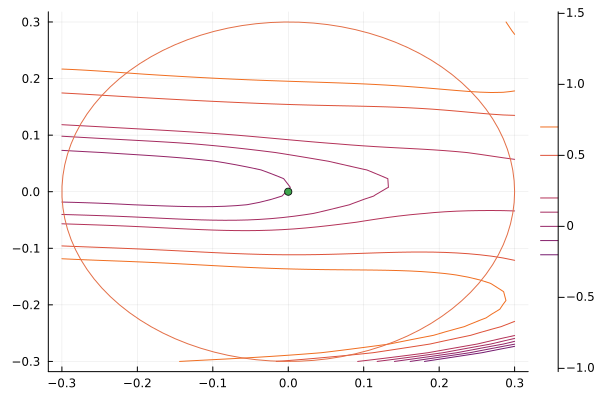

In [7]:
using Plots
x1s = x2s = range(-0.3, stop = 0.3, length = 40)
ϕs = ϕ_opt.(x1s', x2s)
contour(x1s, x2s, ϕs, levels=[-0.2, -0.1, 0, 0.1, 0.2, 0.5, 0.7])
θ = range(0, stop = 2π, length = 100)
plot!(r * cos.(θ), r * sin.(θ), label = "")
scatter!([0], [0], label = "")

We can compute the Laplace average as follows:

In [8]:
using DifferentialEquations
function S(t, x1, x2, solver = DifferentialEquations.Tsit5())
    tspan = (0.0, t)
    prob = DifferentialEquations.ODEProblem((v, p, t) -> [f(x => v) for f in F], [x1, x2], tspan)
    traj = DifferentialEquations.solve(prob, solver, reltol=1e-4, abstol=1e-4)
    return traj[end]
end

using QuadGK
function laplace_average(f, λ, x1, x2, T = 10, args...)
    v, _ = quadgk(0, T, rtol=1e-3) do t
        s = S(t, x1, x2, args...)
        return f(S(t, x1, x2, args...)) * exp(-λ * t)
    end
    return v / T
end

lap(x1, x2) = laplace_average(v -> ϕ_opt(x => v), λ, x1, x2, 10)
laplace = lap.(x1s', x2s)

40×40 Matrix{Float64}:
 0.618061  0.614178  0.60956   …  -14.2739    -18.8686     -24.1192
 0.862143  0.856984  0.851327      -3.49867    -5.20908     -7.63231
 0.994898  0.98889   0.982479      -0.581684   -1.03645     -1.72318
 1.0671    1.06053   1.05359        0.124289   -0.0127953   -0.208983
 1.09548   1.08852   1.08126        0.329489    0.266793     0.188771
 1.08954   1.08234   1.07487   …    0.406578    0.363947     0.316699
 1.0566    1.04928   1.04171        0.435971    0.401234     0.364622
 1.00286   0.995514  0.98796        0.438381    0.408603     0.377729
 0.933583  0.926328  0.918873       0.421975    0.396264     0.36978
 0.853258  0.846171  0.838903       0.391982    0.36992      0.347253
 ⋮                             ⋱                           
 0.226977  0.230224  0.233556       0.435791    0.445866     0.456279
 0.296491  0.299941  0.303478       0.513997    0.524231     0.534754
 0.370956  0.374563  0.378261       0.595247    0.605526     0.616038
 0.44957   0

The error is given by:

In [9]:
norm(laplace - ϕs)

37.55957308999151

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*